# Heart Disease Predictor

### Life cycle of Machine earning project
- Understand Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-processing
- Model Training
- Choose best model
- Tune model

## 1) Problem statement
- This project understandss how heart disease is affected by variables such as sex, health, physical activity, sleep, mental health, physical health, what state they live in and many more.
## 2) Data Collection
- Dataset Source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/data
- The data I will be using is from 2022 containing 40 columns and 445,132 rows.

## 2.1 Import Data and Required packages

In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [103]:
df = pd.read_csv('data/heart_2022_with_nans.csv')
print(df.shape)
df.head()

#move and rename column
move_col = df.pop("HadHeartAttack")
df['HasHeartDisease'] = move_col

df.head()


(445132, 40)


,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadAngina,...,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HasHeartDisease
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,63.50,25.61,No,No,No,No,NaN,No,Yes,No
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No,No


## 3 Data Checks to perform
- Check missing values
- Check for duplicates
- Check number of unique values in each column
- Check data types
- Check statistics of dataset
- Check various categories present in the different categrical column

## 3.1 Check missing values

In [104]:
#display percentage of NaNs in columns
for column in df.columns:
    percentage = df[column].isnull().mean()
    print(column + ": " + str(round(percentage*100,2)))

State: 0.0
Sex: 0.0
GeneralHealth: 0.27
PhysicalHealthDays: 2.45
MentalHealthDays: 2.04
LastCheckupTime: 1.87
PhysicalActivities: 0.25
SleepHours: 1.23
RemovedTeeth: 2.55
HadAngina: 0.99
HadStroke: 0.35
HadAsthma: 0.4
HadSkinCancer: 0.71
HadCOPD: 0.5
HadDepressiveDisorder: 0.63
HadKidneyDisease: 0.43
HadArthritis: 0.59
HadDiabetes: 0.24
DeafOrHardOfHearing: 4.64
BlindOrVisionDifficulty: 4.84
DifficultyConcentrating: 5.45
DifficultyWalking: 5.39
DifficultyDressingBathing: 5.37
DifficultyErrands: 5.76
SmokerStatus: 7.97
ECigaretteUsage: 8.01
ChestScan: 12.59
RaceEthnicityCategory: 3.16
AgeCategory: 2.04
HeightInMeters: 6.44
WeightInKilograms: 9.45
BMI: 10.96
AlcoholDrinkers: 10.46
HIVTesting: 14.86
FluVaxLast12: 10.59
PneumoVaxEver: 17.31
TetanusLast10Tdap: 18.54
HighRiskLastYear: 11.37
CovidPos: 11.4
HasHeartDisease: 0.69


In [105]:
#drop NaNs
df = df.dropna()

In [106]:
df.shape

(246022, 40)

## 3.2 Check Duplicates

In [107]:
df.duplicated().sum()

np.int64(9)

## 3.3 Check number of unique values of each column

In [108]:
column = 'SmokerStatus'

# Print the unique values
print(df[column].unique())

df.nunique()


['Former smoker' 'Never smoked' 'Current smoker - now smokes every day'
 'Current smoker - now smokes some days']


State                          54
Sex                             2
GeneralHealth                   5
PhysicalHealthDays             31
MentalHealthDays               31
LastCheckupTime                 4
PhysicalActivities              2
SleepHours                     23
RemovedTeeth                    4
HadAngina                       2
HadStroke                       2
HadAsthma                       2
HadSkinCancer                   2
HadCOPD                         2
HadDepressiveDisorder           2
HadKidneyDisease                2
HadArthritis                    2
HadDiabetes                     4
DeafOrHardOfHearing             2
BlindOrVisionDifficulty         2
DifficultyConcentrating         2
DifficultyWalking               2
DifficultyDressingBathing       2
DifficultyErrands               2
SmokerStatus                    4
ECigaretteUsage                 4
ChestScan                       2
RaceEthnicityCategory           5
AgeCategory                    13
HeightInMeters

## 3.4 Check data types

In [109]:
df.dtypes

State                         object
Sex                           object
GeneralHealth                 object
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime               object
PhysicalActivities            object
SleepHours                   float64
RemovedTeeth                  object
HadAngina                     object
HadStroke                     object
HadAsthma                     object
HadSkinCancer                 object
HadCOPD                       object
HadDepressiveDisorder         object
HadKidneyDisease              object
HadArthritis                  object
HadDiabetes                   object
DeafOrHardOfHearing           object
BlindOrVisionDifficulty       object
DifficultyConcentrating       object
DifficultyWalking             object
DifficultyDressingBathing     object
DifficultyErrands             object
SmokerStatus                  object
ECigaretteUsage               object
ChestScan                     object
R

## 3.5 Check statistics of dataset

In [110]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000
mean,4.119026,4.167140,7.021331,1.705150,83.615179,28.668136
std,8.405844,8.102687,1.440681,0.106654,21.323156,6.513973
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


## 3.6 Define numerical and categorical columns

In [111]:
numeric_col = [col for col in df.columns if df[col].dtype != 'O']
categorical_col = [col for col in df.columns if df[col].dtype == 'O']

#print columns
print('We have {} numeric columns : {}'.format(len(numeric_col), numeric_col))
print('We have {} categorical columns : {}'.format(len(categorical_col), categorical_col))

We have 6 numeric columns : ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']
We have 34 categorical columns : ['State', 'Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities', 'RemovedTeeth', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos', 'HasHeartDisease']


## 3.7 Rename elements in columns for convience

In [112]:
df['AgeCategory'] = df['AgeCategory'].replace({
    'Age 18 to 24': '18 to 24',
    'Age 25 to 29': '25 to 29',
    'Age 30 to 34': '30 to 34',
    'Age 35 to 39': '35 to 39',
    'Age 40 to 44': '40 to 44',
    'Age 45 to 49': '45 to 49',
    'Age 50 to 54': '50 to 54',
    'Age 55 to 59': '55 to 59',
    'Age 60 to 64': '60 to 64',
    'Age 65 to 69': '65 to 69',
    'Age 70 to 74': '70 to 74',
    'Age 75 to 79': '75 to 79',
    'Age 80 or older': '80 or older',
    })

df['SmokerStatus'] = df['SmokerStatus'].replace({
    'Current smoker - now smokes every day': 'Smokes every day',
    'Current smoker - now smokes some days' : 'Smokes some days',
    })

df['ECigaretteUsage']=df['ECigaretteUsage'].replace({
    'Never used e-cigarettes in my entire life': 'Never',
    'Not at all (right now)': 'Not right now',
    'Use them some days': 'Use some days',
    'Use them every day': 'User every day',
})

df['CovidPos']=df['CovidPos'].replace({"Tested positive using home test without a health professional": "Yes (home test)"})

df['HadDiabetes']=df['HadDiabetes'].replace({
    "Yes, but only during pregnancy (female)": "Yes (while pregnant)", 
    "No, pre-diabetes or borderline diabetes":"No, Prediabetes/Borderline Diabetes"})

df['TetanusLast10Tdap'] = df['TetanusLast10Tdap'].replace({
    'No, did not receive any tetanus shot in the past 10 years': 'No for past 10 yrs',
    'Yes, received tetanus shot but not sure what type': 'Yes, but dont know type',
    'Yes, received tetanus shot, but not Tdap': 'Yes but not Tdap'
})

df['LastCheckupTime'] = df['LastCheckupTime'].replace({
    'Within past year (anytime less than 12 months ago)':'Within past year',
    'Within past 2 years (1 year but less than 2 years ago)':'Within past 2 year',
    'Within past 5 years (2 years but less than 5 years ago)': 'Within past 5 year',
    '5 or more years ago':'5+ years ago'
})

In [113]:
df.to_csv('data/heart_clean.csv', index=False)

## 4 Exploring Data Visualization

## 4.1 Demographic

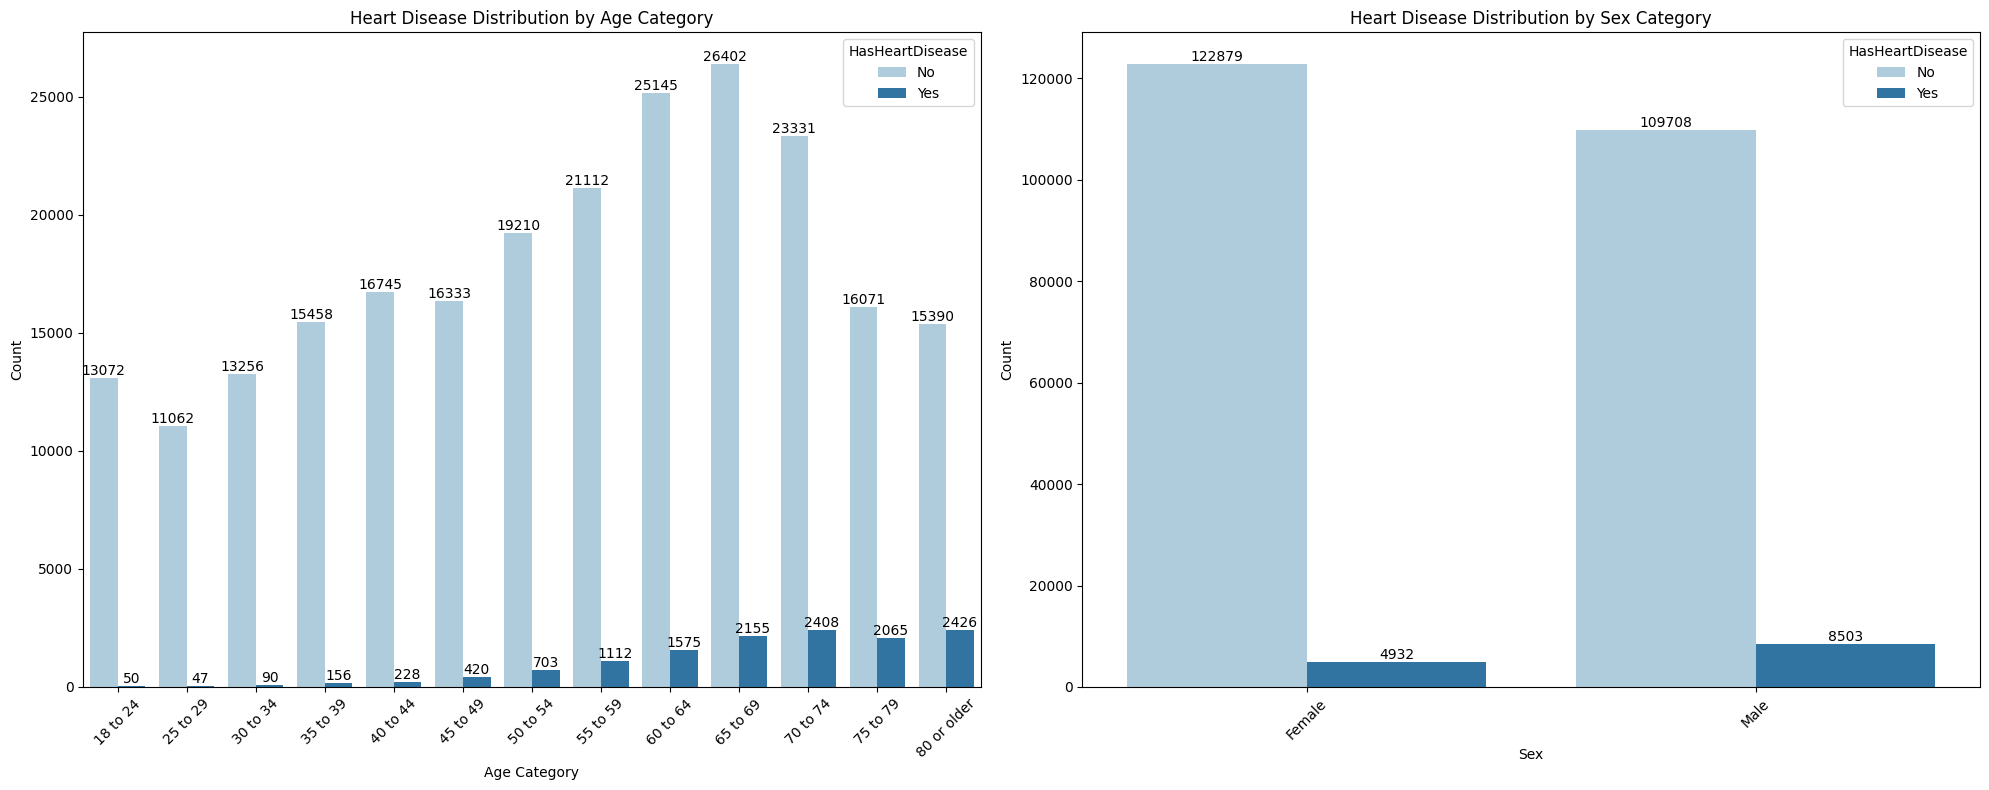

In [114]:
custom = [
    '18 to 24', '25 to 29', '30 to 34', '35 to 39',
    '40 to 44', '45 to 49', '50 to 54', '55 to 59',
    '60 to 64', '65 to 69', '70 to 74', '75 to 79',
    '80 or older',
]

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: Age vs Heart Disease
ax1 = axes[0]
sns.countplot(data=df, 
              x='AgeCategory', 
              hue='HasHeartDisease',
              order=custom,
              palette='Paired',
              ax=ax1)

for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', label_type='edge')

ax1.set_title('Heart Disease Distribution by Age Category')
ax1.set_xlabel('Age Category')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Sex vs Heart Disease
ax2 = axes[1]
sns.countplot(data=df, 
              x='Sex', 
              hue='HasHeartDisease', 
              palette='Paired',
              ax=ax2)

for container in ax2.containers:
    ax2.bar_label(container, fmt='%d', label_type='edge')

ax2.set_title('Heart Disease Distribution by Sex Category')
ax2.set_xlabel('Sex')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Insights
- Heart disease is more common in older people compared to younger people.
- Heart disease is more common in males despite there being more females in the dataset.

## 4.2 Lifestyle

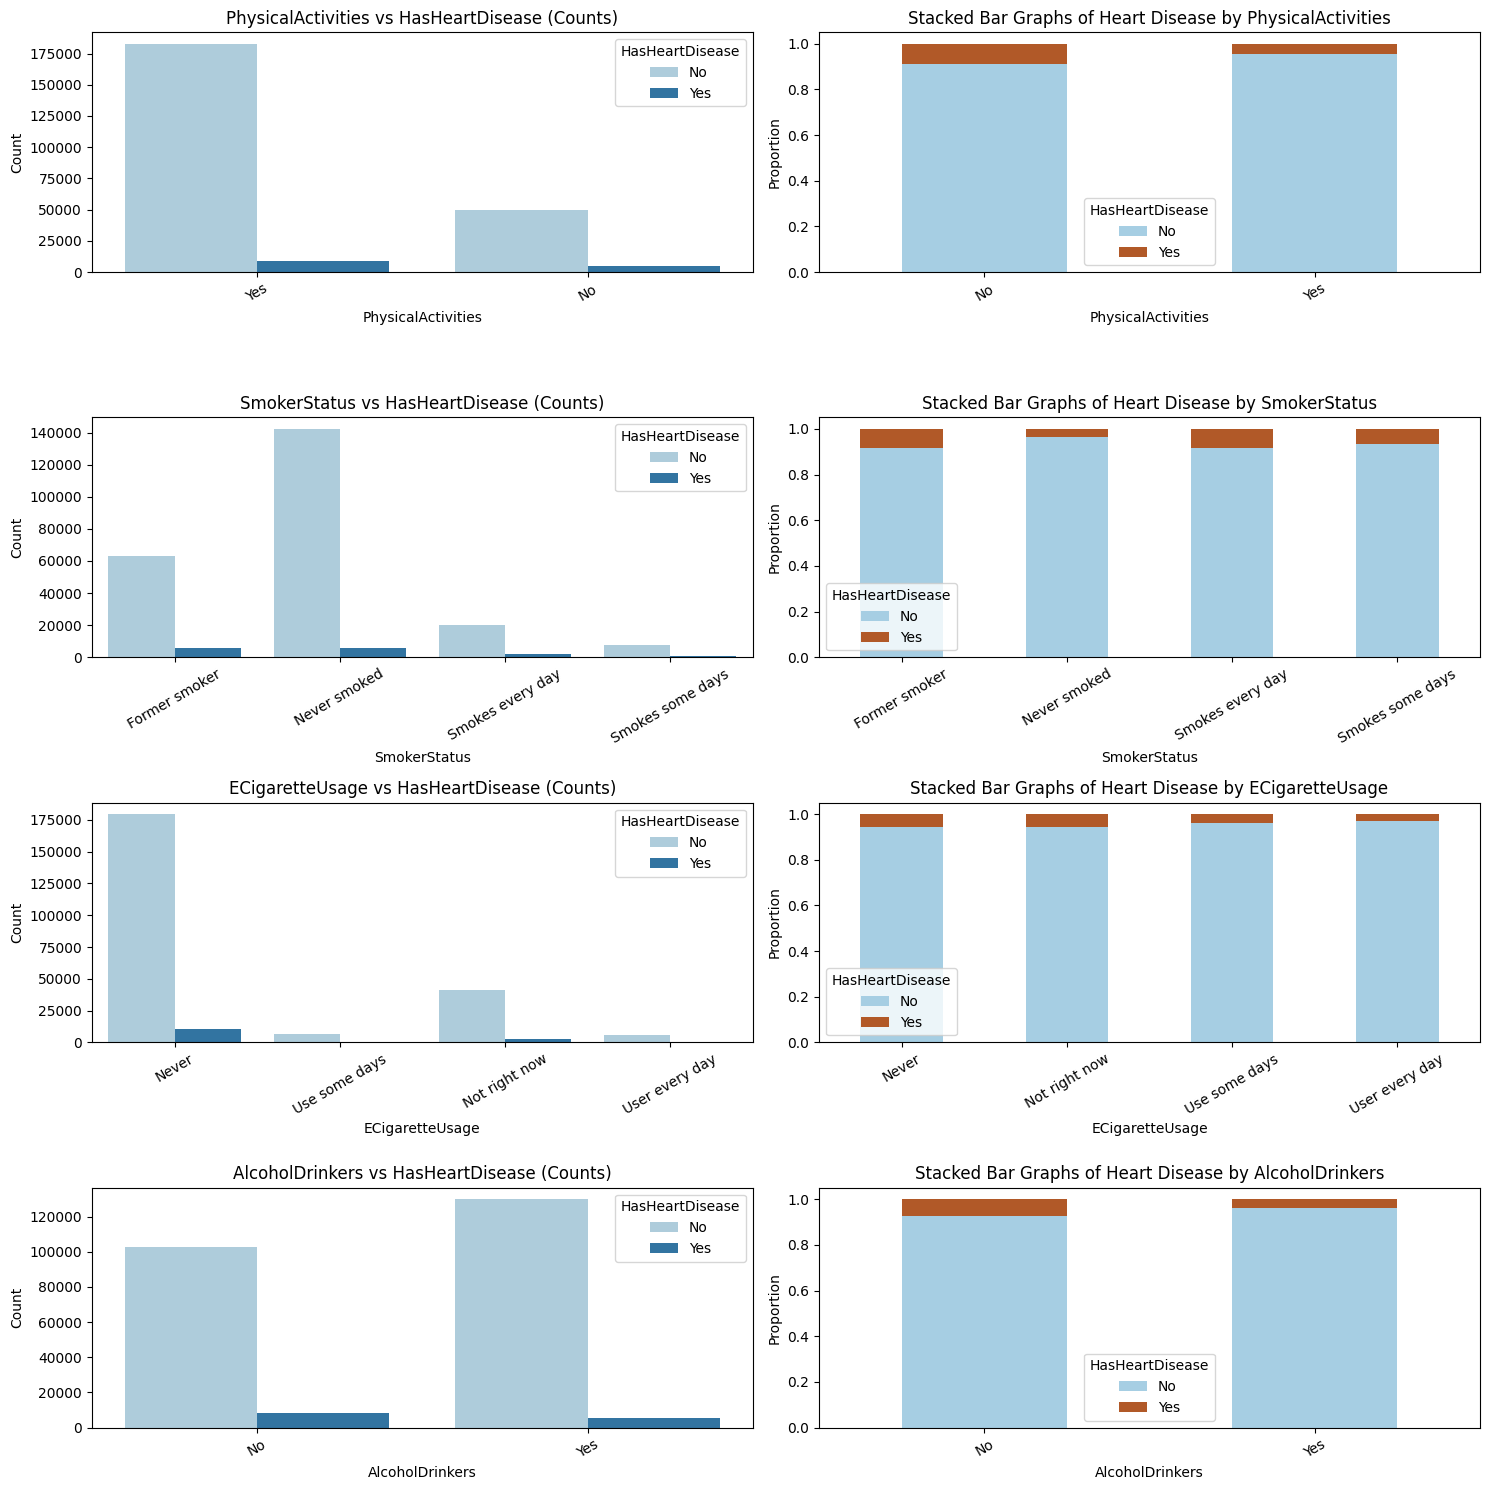

In [115]:
lifestyle_vars = ["PhysicalActivities", "SmokerStatus", "ECigaretteUsage", "AlcoholDrinkers"]
data_cols = df[lifestyle_vars + ["HasHeartDisease"]]

# 2 columns: left = counts, right = proportions
fig, axes = plt.subplots(4, 2, figsize=(15, 15))

for i, col in enumerate(lifestyle_vars):
    sns.countplot(
        data=data_cols,
        x=col, 
        hue="HasHeartDisease", 
        ax=axes[i, 0], 
        palette="Paired"
    )
    axes[i, 0].set_title(f"{col} vs HasHeartDisease (Counts)")
    axes[i, 0].set_ylabel("Count")
    axes[i, 0].legend(title="HasHeartDisease", labels=["No", "Yes"])
    axes[i, 0].tick_params(axis='x', labelrotation=30)

    #proportion charts
    proportions = (
        data_cols.groupby(col)['HasHeartDisease']
        .value_counts(normalize=True)
        .unstack()
    )
    proportions.plot(
        kind='bar', 
        stacked=True, 
        ax=axes[i, 1], 
        colormap='Paired'
    )
    axes[i, 1].set_title(f"Stacked Bar Graphs of Heart Disease by {col}")
    axes[i, 1].set_ylabel("Proportion")
    axes[i, 1].set_xlabel(col)
    axes[i, 1].legend(title="HasHeartDisease", labels=["No", "Yes"])
    axes[i, 1].tick_params(axis='x', labelrotation=30)

plt.tight_layout()
plt.show()


### Insights
- Lifestyle factors show unexpected patterns where healthier choices correspond with higher heart disease rates. This may reflect confounding variables such as age or unintentional data collection bias since there are more people who chose healthier lifestyles than those who did not in the dataset.
- Higher heart disease rates among non-drinkers may reflect that some stopped drinking due to health issues or other confounding factors. More analysis is needed to separate lifelong abstainers from former drinkers and adjust for age and health status.

## 4.3 Health

### 4.3.1 Physical Attributes

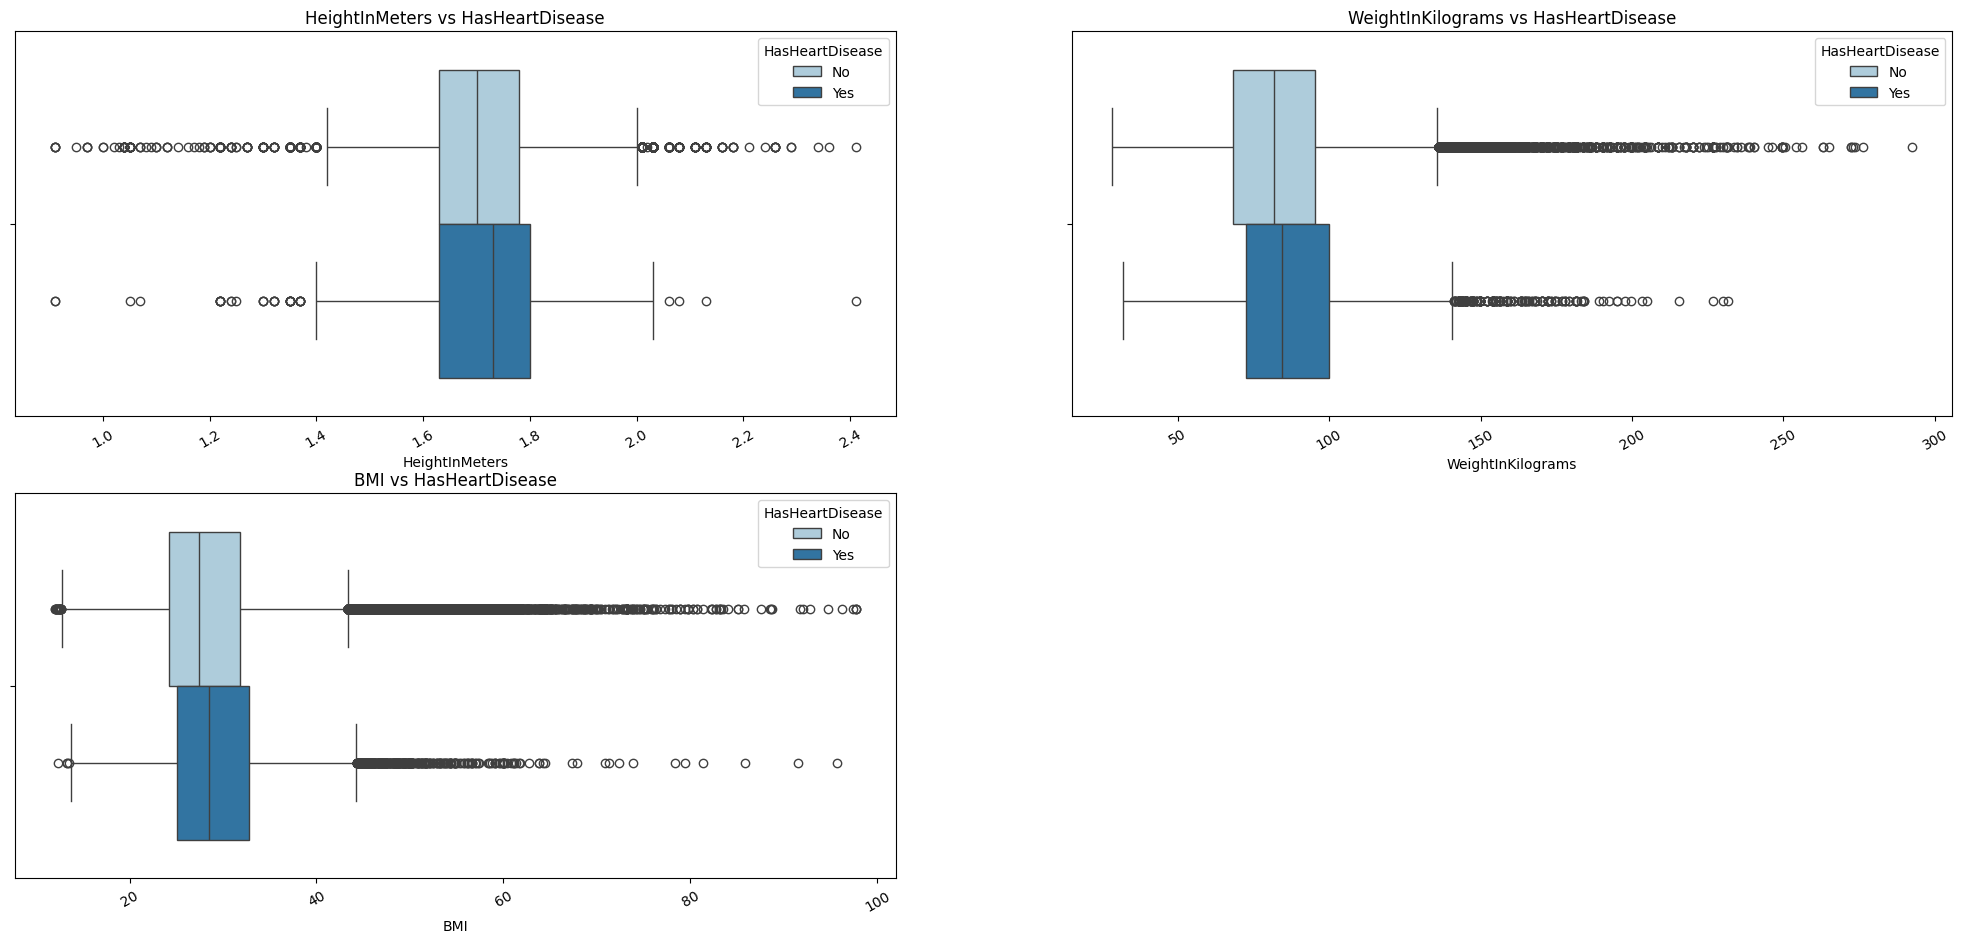

In [116]:
#for box plots
health_vars = ["HeightInMeters", "WeightInKilograms", "BMI"]
data_cols = df[["HeightInMeters", "WeightInKilograms", "BMI", "HasHeartDisease"]]

# # health 1 variables plot
fig, axes = plt.subplots(2, 2, figsize=(25, 11))  
axes = axes.flatten()

for i, col in enumerate(health_vars):
    sns.boxplot(data=data_cols, x=col, hue="HasHeartDisease", ax=axes[i], palette="Paired")
    axes[i].set_title(f"{col} vs HasHeartDisease")
    axes[i].legend(title="HasHeartDisease", labels=["No", "Yes"])
    
    # Rotate and shrink x-axis labels
    axes[i].tick_params(axis='x', labelrotation=30)

axes[-1].axis('off')
plt.show()


### Insights
- Height does not seem to have a great impact on whether an individual has heart disease or not in this dataset. The distributions are nearly identical regardless of heart disease status
- Both weight(kg) and BMI have positive association with heart disease. On average, individuals with higher weight and BMI tend to have heart disease. This dincates that both those factors are a significant factor in heart disease risk.

### 4.3.2 Physical Well-being

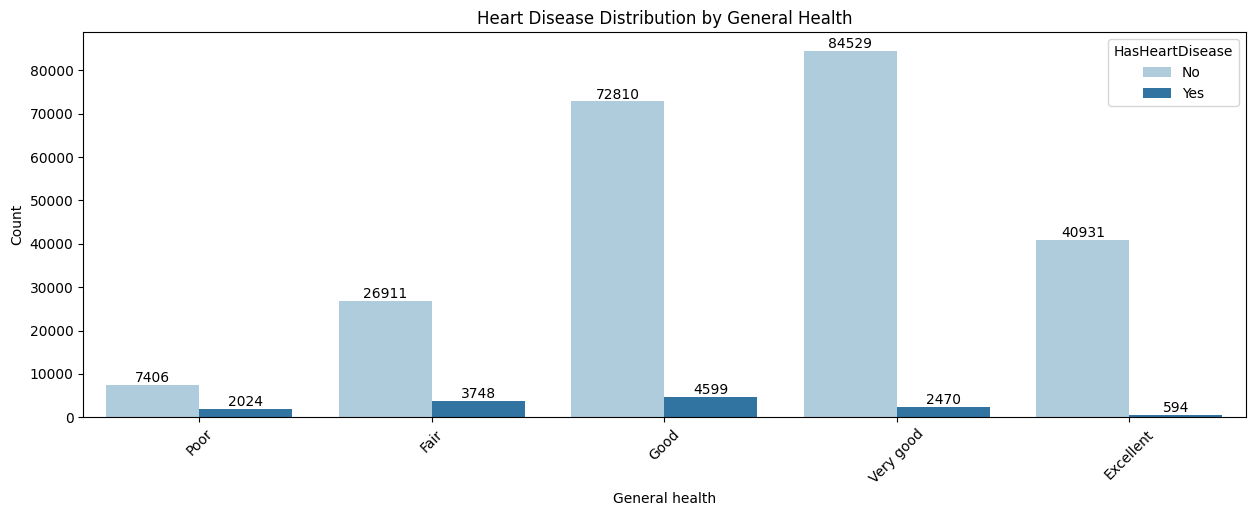

In [117]:
custom=['Poor', 'Fair', 'Good', 'Very good', 'Excellent']
plt.figure(figsize=(15, 5))
ax = sns.countplot(data=df, 
              x='GeneralHealth', 
              hue='HasHeartDisease', 
              palette='Paired',
              order=custom)

for container in ax.containers:     # label bar value counts
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Heart Disease Distribution by General Health')
plt.xlabel('General health')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Insights
- There is a strong negative correaltion with self report health and heart disease. Those who reported with "Very good" and "Excellent" have smaller counts than those who reported "Poor", "Fair", and "Good." As health declines so the chance of heart disease increase.

### 4.3.3 Mental Well-being

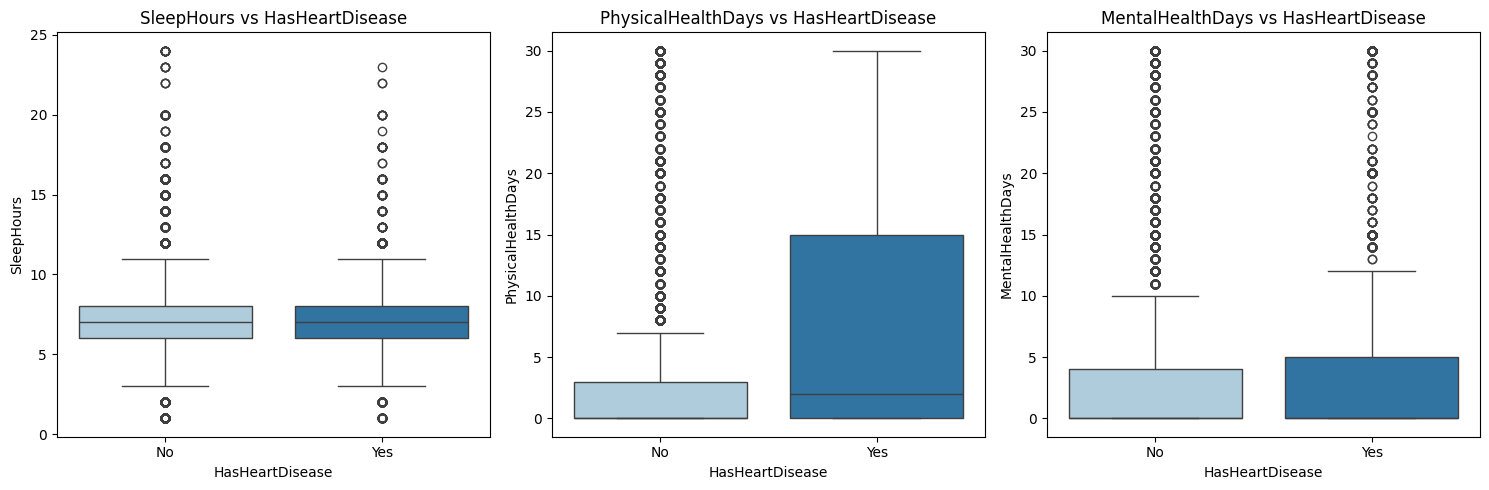

In [118]:
#for bar graph
health3_vars = ["SleepHours", "PhysicalHealthDays", "MentalHealthDays" ]
data_cols3 = df[["SleepHours","PhysicalHealthDays", "MentalHealthDays", "HasHeartDisease"]]

#health 2 variablees plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  
axes = axes.flatten()

for i, col in enumerate(health3_vars):
    sns.boxplot(
        data=data_cols3,
        x="HasHeartDisease",
        y=col,               
        ax=axes[i],
        palette="Paired"
    )
    
    axes[i].set_title(f"{col} vs HasHeartDisease")
    axes[i].set_xticklabels(["No", "Yes"]) 

plt.tight_layout()
plt.show()

### Insights
- Amount of sleep hours does not seem to have a great impact on whether an individual has heart disease or not in this dataset. The distributions are nearly identical regardless of heart disease status.
- Amount of mental health days does not seem to have a great impact on whether an individual has heart disease or not in this dataset. The distributions are nearly identical regardless of heart disease status.
- There is a much larger IQR in physical health days taken for people who have heart disease. This indicates that people with heart disease have a much wider range of reported physically unhealthy days than those without heart disease.

## 4.4 Conditions/Diseases

In [119]:
cond_vars = ["HadAngina", "HadStroke", "HadAsthma", "HadSkinCancer", "HadCOPD", "HadDepressiveDisorder", 
                                "HadKidneyDisease", "HadArthritis", "HighRiskLastYear","HasHeartDisease"]

data_cols = df[["HadAngina", "HadStroke", "HadAsthma", "HadSkinCancer","CovidPos", "HadDiabetes", "HadCOPD", "HadDepressiveDisorder", 
                                "HadKidneyDisease", "HadArthritis", "HighRiskLastYear", "HasHeartDisease"]]

cond_var_cat=["CovidPos", "HadDiabetes"]

### 4.4.1 Correlation Map (Excluding CovidPos and HadDiabetes)

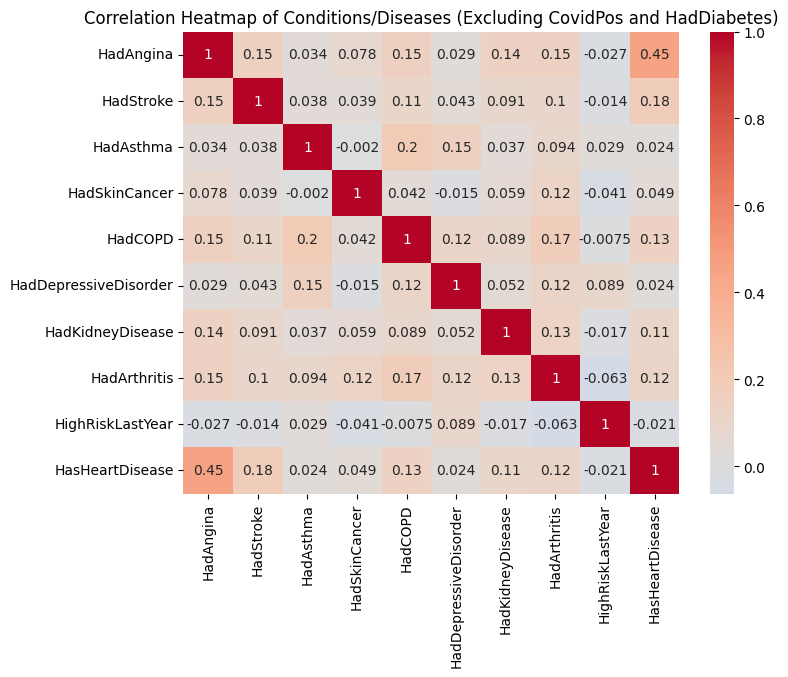

In [120]:
map = {"Yes": 1, "No": 0,}

df_mapped=df.copy()
df_mapped= df[cond_vars].replace(map)


# Compute correlation matrix (Pearson correlation by default)
corr = df_mapped[cond_vars].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Conditions/Diseases (Excluding CovidPos and HadDiabetes)")
plt.show()

### Insights
- There is a strong correlation with having had angina and heart disease.
- There are weak correlations with stroking, COPD (Chronic Obstructive Pulmonary Diseas), kidney disease and arthritis. These correlations are less impactful individually but they may contribute collectively or under specific conditions.
- These correlations do no establish causation and can be viewed as insights that warrant further investigation through more statiscal analysis.

### 4.4.2 Bar Graph (CovidPos and HadDiabetes)

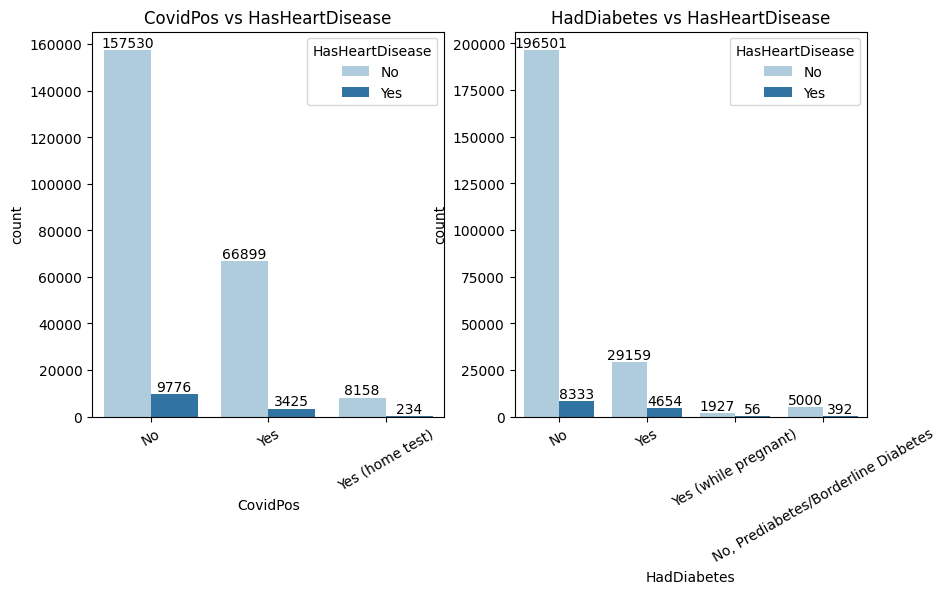

In [121]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
for i, col in enumerate(cond_var_cat):
    ax = sns.countplot(data=data_cols, x=col, hue="HasHeartDisease", ax=axes[i], palette="Paired")
    axes[i].set_title(f"{col} vs HasHeartDisease")
    axes[i].legend(title="HasHeartDisease", labels=["No", "Yes"])
    
    for container in ax.containers:     # label bar value counts
        ax.bar_label(container, fmt='%d', label_type='edge')
    
    # Rotate and shrink x-axis labels
    axes[i].tick_params(axis='x', labelrotation=30)


### Insights
- Diabetes has a much stronger correlation to heart disease compared to COVID status in this dataset.
- COVID status based on its value counts does not show a strong relationship with heart disease.

## 4.5 Difficulties in activities

### 4.5.1 Correlation map (without RemovedTeeth)

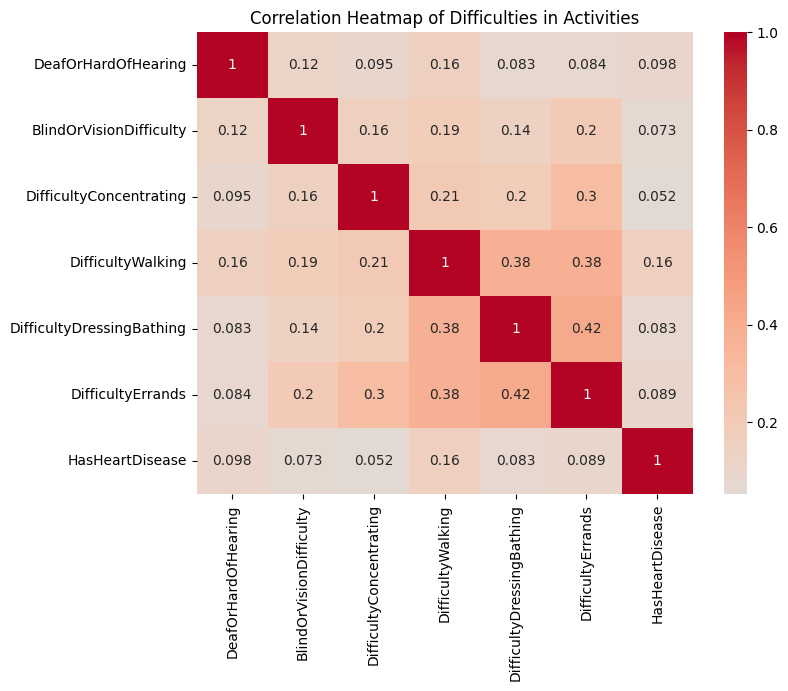

In [122]:
diff_cols = ["DeafOrHardOfHearing", "BlindOrVisionDifficulty", "DifficultyConcentrating", "DifficultyWalking", "DifficultyDressingBathing", 
                                "DifficultyErrands", "HasHeartDisease"]

data_cols = df[["DeafOrHardOfHearing", "BlindOrVisionDifficulty", "DifficultyConcentrating", "DifficultyWalking", "DifficultyDressingBathing", 
                                "DifficultyErrands", "RemovedTeeth", "HasHeartDisease"]]
removed_teeth = ["RemovedTeeth"]


map = {"Yes": 1, "No": 0,}
df_mapped=df.copy()
df_mapped= df[diff_cols].replace(map)


# Compute correlation matrix (Pearson correlation by default)
corr = df_mapped[diff_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Difficulties in Activities")
plt.show()
        

### Insights
- The most significant correlation to heart disease would be difficulty walking.
- The rest of the columns do no indicate any major correlation heart disease.
- Based on this dataset there isn't a strong relationship between these difficulties and heart disease. There are very small tendencies but  nothing strong.

### 4.5.2 Bar Graph RemovedTeeth

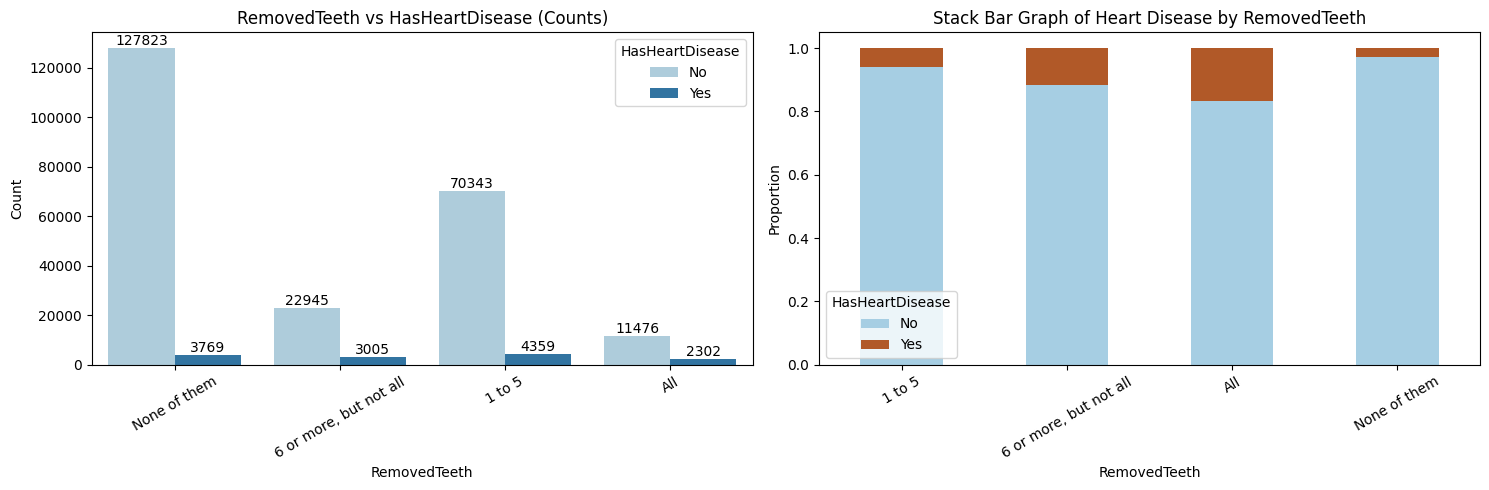

In [123]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  

#count plot
ax = sns.countplot(
    data=data_cols,
    x='RemovedTeeth', 
    hue="HasHeartDisease", 
    ax=axes[0], 
    palette="Paired"
)

for container in ax.containers:     # label bar value counts
        ax.bar_label(container, fmt='%d', label_type='edge')

axes[0].set_title("RemovedTeeth vs HasHeartDisease (Counts)")
axes[0].set_ylabel("Count")
axes[0].legend(title="HasHeartDisease", labels=["No", "Yes"])
axes[0].tick_params(axis='x', labelrotation=30)

#proportion charts
proportions = (
    data_cols.groupby("RemovedTeeth")['HasHeartDisease']
    .value_counts(normalize=True)
    .unstack()
)
proportions.plot(
    kind='bar', 
    stacked=True, 
    ax=axes[1], 
    colormap='Paired'
)
axes[1].set_title("Stack Bar Graph of Heart Disease by RemovedTeeth")
axes[1].set_ylabel("Proportion")
axes[1].set_xlabel("RemovedTeeth")
axes[1].legend(title="HasHeartDisease", labels=["No", "Yes"])
axes[1].tick_params(axis='x', labelrotation=30)

plt.tight_layout()
plt.show()


### Insights
- Tooth loss seems positively associated with heart disease and increases as the number of removed teeth goes up, despite the fact that most people in the dataset have few to no removed teeth.
- This correlation does not establish causation as it can be in addition to a collective of other factors such as age and health.

## 4.6 Health Screenings

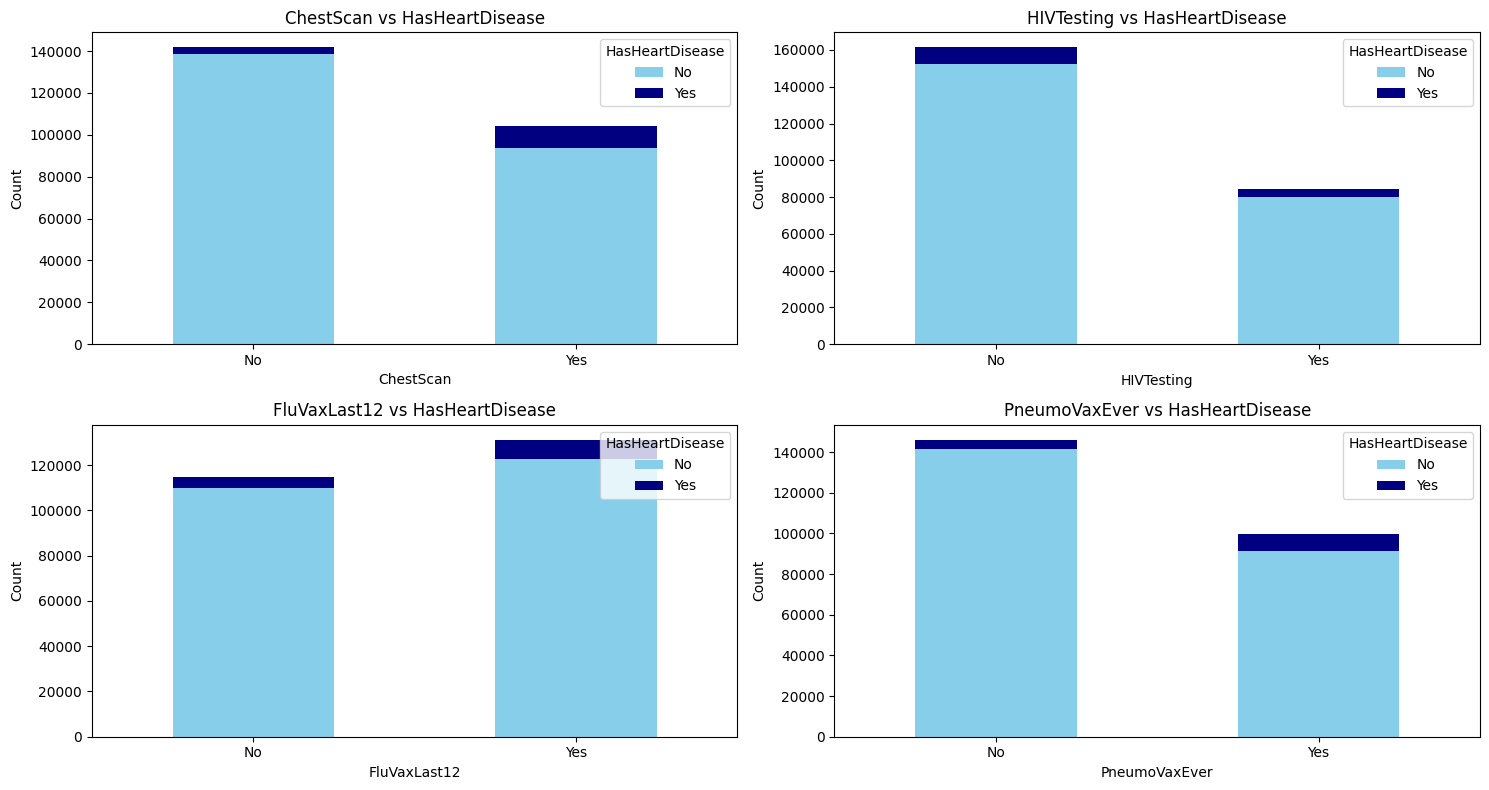

In [124]:
yesno_cols = ["ChestScan", "HIVTesting", "FluVaxLast12", "PneumoVaxEver"]
data_cols = df[["ChestScan", "HIVTesting", "FluVaxLast12", "PneumoVaxEver", "LastCheckupTime","TetanusLast10Tdap", "HasHeartDisease"]]

fig, axes = plt.subplots(2, 2, figsize=(15, 8))  # 2x2 grid for your 4 columns
axes = axes.flatten()

for i, col in enumerate(yesno_cols):
    # Create a crosstab between the Yes/No column and HasHeartDisease
    ctab = pd.crosstab(df[col], df["HasHeartDisease"])
    # Plot stacked bar chart
    ctab.plot(kind="bar", stacked=True, ax=axes[i], color=["skyblue", "navy"])
    
    axes[i].set_title(f"{col} vs HasHeartDisease")
    axes[i].set_ylabel("Count")
    axes[i].legend(title="HasHeartDisease", loc="upper right")
    axes[i].tick_params(axis='x', labelrotation=0)    

    

plt.tight_layout()
plt.show()

### Insights
- Those who answered 'Yes' to having heart disease have taken extra percautions and perventitive measures than those who did not.

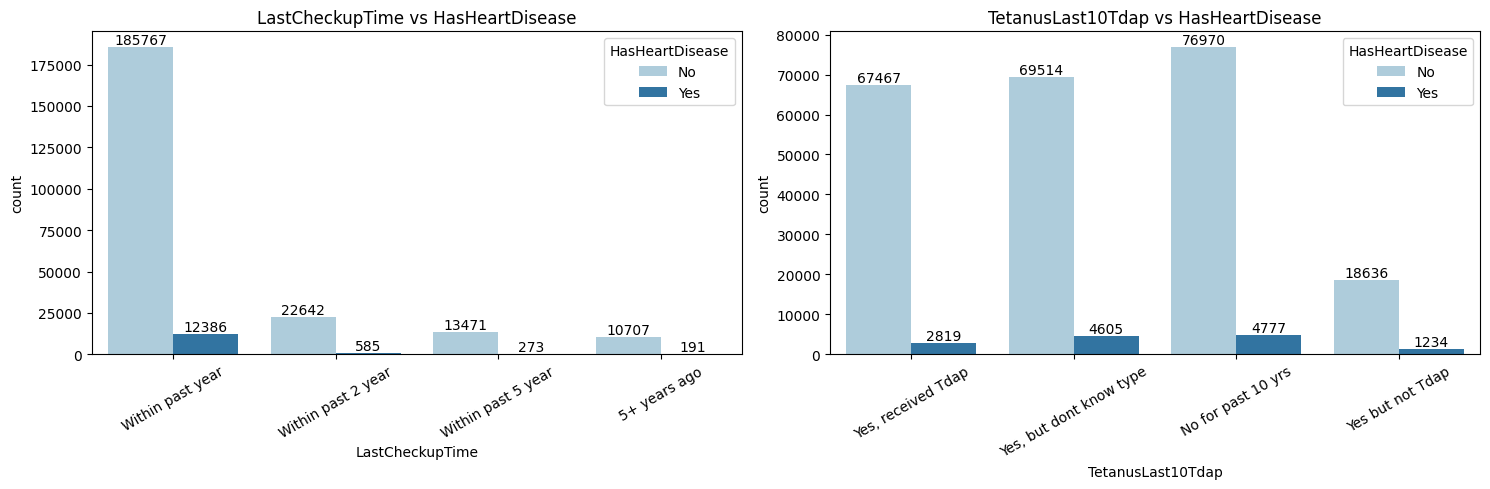

In [125]:
cat_cols = ["LastCheckupTime","TetanusLast10Tdap"]

data_cols = df[["LastCheckupTime","TetanusLast10Tdap", "HasHeartDisease"]]
custom = ['Within past year','Within past 2 year','Within past 5 year','5+ years ago']


fig, axes = plt.subplots(1, 2, figsize=(15, 5))
for i, col in enumerate(cat_cols):
    if i == 0:
        ax = sns.countplot(data=data_cols, x=col, hue="HasHeartDisease", ax=axes[i], palette="Paired", order=custom)
    else:
        ax = sns.countplot(data=data_cols, x=col, hue="HasHeartDisease", ax=axes[i], palette="Paired")
        
    axes[i].set_title(f"{col} vs HasHeartDisease")
    axes[i].legend(title="HasHeartDisease", labels=["No", "Yes"])
    
    for container in ax.containers:     # label bar value counts
        ax.bar_label(container, fmt='%d', label_type='edge')
    
    # Rotate and shrink x-axis labels
    axes[i].tick_params(axis='x', labelrotation=30)

plt.tight_layout()
plt.show()

### Insights
- Those who answered 'Yes' to having heart disease have taken extra percautions such as much more frequenct check ups.
- Tetanus or Tdap shots does not seem to have a strong correlation to heart disease.

## 5 Conclusions
- Analysis shows that heart disease is related to age, weight, diabetes, angina, stroke, and general health. Individuals who are older and have higher body weight are much more prone to heart disease.
- No meaningful relationship was found between heart disease and conditions such as asthma, depression or skin cancer.
- Heart disease has weak correlations to many of the physical difficulties, conditions and diseases I have shown. But these features can still be useful when combined as patterns across mutiple varaiables can help prediction models detect risk factors more precisely